# Day 12
## Puzzle 1

In [186]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

%matplotlib inline

In [187]:
# input_file = 'input_1.txt'
# input_file = 'test_input_1.txt'
input_file = 'test_input_2.txt'

Read garden map.

In [188]:
with open(file=input_file, mode="r") as file:
    map = []

    for line in file:
        map.append(list(line.strip()))

    map_matrix = np.matrix(map)

In [189]:
map_matrix

matrix([['R', 'R', 'R', 'R', 'I', 'I', 'C', 'C', 'F', 'F'],
        ['R', 'R', 'R', 'R', 'I', 'I', 'C', 'C', 'C', 'F'],
        ['V', 'V', 'R', 'R', 'R', 'C', 'C', 'F', 'F', 'F'],
        ['V', 'V', 'R', 'C', 'C', 'C', 'J', 'F', 'F', 'F'],
        ['V', 'V', 'V', 'V', 'C', 'J', 'J', 'C', 'F', 'E'],
        ['V', 'V', 'I', 'V', 'C', 'C', 'J', 'J', 'E', 'E'],
        ['V', 'V', 'I', 'I', 'I', 'C', 'J', 'J', 'E', 'E'],
        ['M', 'I', 'I', 'I', 'I', 'I', 'J', 'J', 'E', 'E'],
        ['M', 'I', 'I', 'I', 'S', 'I', 'J', 'E', 'E', 'E'],
        ['M', 'M', 'M', 'I', 'S', 'S', 'J', 'E', 'E', 'E']], dtype='<U1')

Add edges between adjacent nodes if they have the same value (letter). Nodes without neighbours are also added.

In [190]:
m, n = map_matrix.shape
disconnected_nodes = []
edges = []
labels = {}
colors = {}

for i in range(m):
    for j in range(n):
        current_node_value = map_matrix[i, j]
        labels[(i, j)] = current_node_value
        colors[(i, j)] = ord(current_node_value)
        connected = False
        
        if j + 1 < m:
            current_right_node_value = map_matrix[i, j + 1]

            if current_right_node_value == current_node_value:
                edges.append(((i, j), (i, j + 1)))
                connected = True
            
        if j - 1 >= 0:
            current_left_node_value = map_matrix[i, j - 1]

            if current_left_node_value == current_node_value:
                edges.append(((i, j), (i, j - 1)))
                connected = True

        if i + 1 < n:
            current_bottom_node_value = map_matrix[i + 1, j]

            if current_bottom_node_value == current_node_value:
                edges.append(((i, j), (i + 1, j)))
                connected = True

        if i - 1 >= 0:
            current_top_node_value = map_matrix[i - 1, j]

            if current_top_node_value == current_node_value:
                edges.append(((i, j), (i - 1, j)))
                connected = True

        if not connected:
            disconnected_nodes.append((i, j))

Create a graph of the nodes and edges.

In [191]:
G = nx.Graph()
G.add_nodes_from(disconnected_nodes)
G.add_edges_from(edges)

Plot the graph (only for test input).

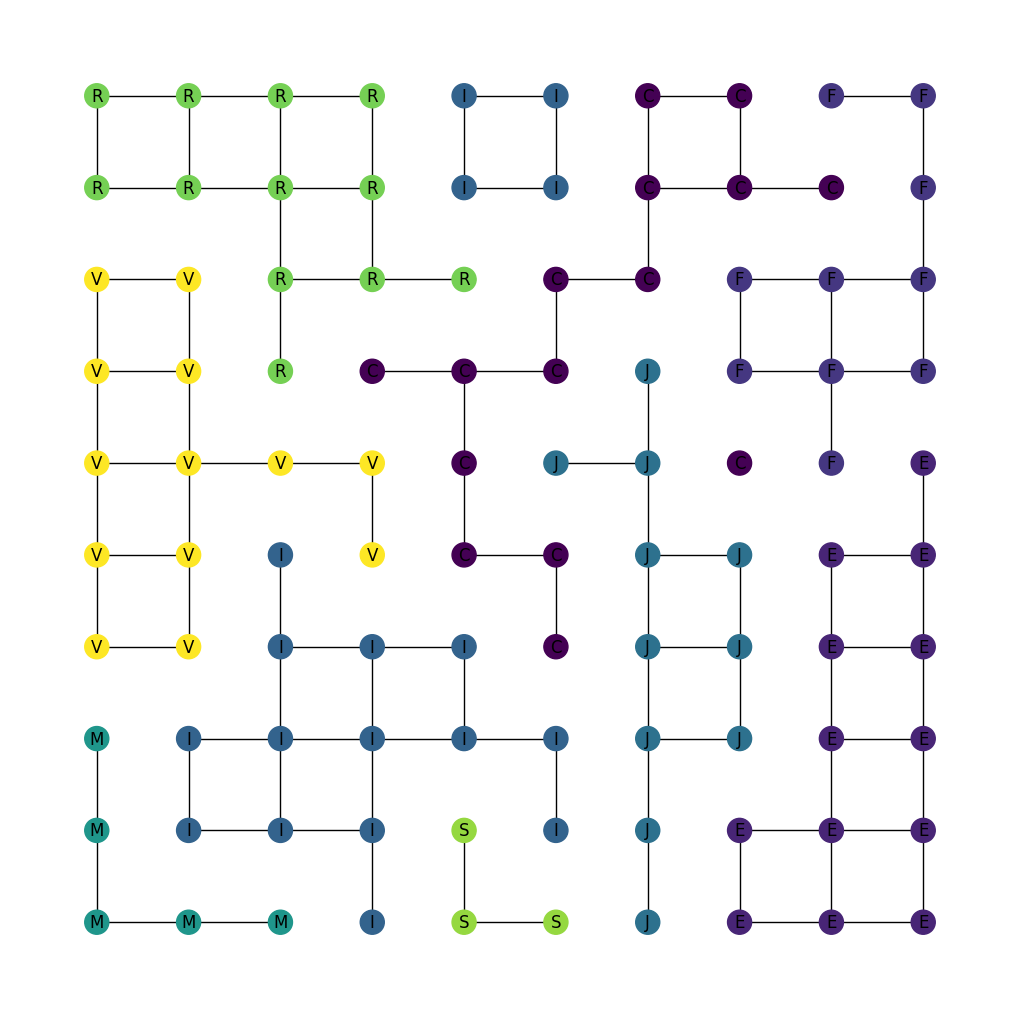

In [192]:
if input_file.startswith('test'):
    plt.figure(figsize=(10, 10))
    positions = {node: (node[1], -node[0]) for node in G.nodes}
    nx.draw(G, with_labels=True, pos=positions, labels=labels, cmap='viridis', node_color=[colors[node] for node in G.nodes])

Loop through the subgraphs of connected components (plant type regions). For each region, the area is calculated by the number of nodes, the perimiter is calculated by 4 times the number of nodes minus two times the number of edges. The region price is then calculated by multiplying the area and the perimiter.

In [193]:
fence_price = 0

for nodes in nx.connected_components(G):
    S = G.subgraph(nodes)
    number_of_nodes = S.number_of_nodes()
    number_of_edges = S.number_of_edges()
    area = number_of_nodes
    perimiter = 4*number_of_nodes - 2*number_of_edges
    fence_price += area*perimiter

In [194]:
fence_price

1930

## Puzzle 2

This time, when we loop through the subgraphs of connected components, we also add "fence nodes and edges" and connect the sides to each other and count the number of sides by counting the number of connected components in the region's "fence graph".

In [195]:
fence_graphs = []
fence_graph_labels = {}
fence_price = 0

for nodes in nx.connected_components(G):
    S = G.subgraph(nodes)
    fence_nodes = []
    
    for node in nodes:
        neighbours = set(S.neighbors(node))

        if (node[0], node[1] + 1) not in neighbours:
            right_fence_node = (node[0], node[1] + 0.2)
            fence_nodes.append(right_fence_node)
            fence_graph_labels[right_fence_node] = labels[node].lower()

        if (node[0], node[1] - 1) not in neighbours:
            left_fence_node = (node[0], node[1] - 0.2)
            fence_nodes.append(left_fence_node)
            fence_graph_labels[left_fence_node] = labels[node].lower()

        if (node[0] + 1, node[1]) not in neighbours:
            upper_fence_node = (node[0] + 0.2, node[1])
            fence_nodes.append(upper_fence_node)
            fence_graph_labels[upper_fence_node] = labels[node].lower()

        if (node[0] - 1, node[1]) not in neighbours:
            lower_fence_node = (node[0] - 0.2, node[1])
            fence_nodes.append(lower_fence_node)
            fence_graph_labels[lower_fence_node] = labels[node].lower()

    fence_edges = []
    disconnected_fence_nodes = set(fence_nodes)

    for n1, n2 in combinations(fence_nodes, 2):
        if np.linalg.norm(np.array(n1) - np.array(n2)) == 1.0:
            fence_edges.append((n1, n2))
            disconnected_fence_nodes -= {n1, n2}

    F = nx.Graph()
    F.add_edges_from(fence_edges)
    F.add_nodes_from(disconnected_fence_nodes)
    fence_graphs.append(F)

    area = S.number_of_nodes()
    sides = nx.number_connected_components(F)
    fence_price += area*sides


In [196]:
fence_price

1206

Plot the graph (only for test input).

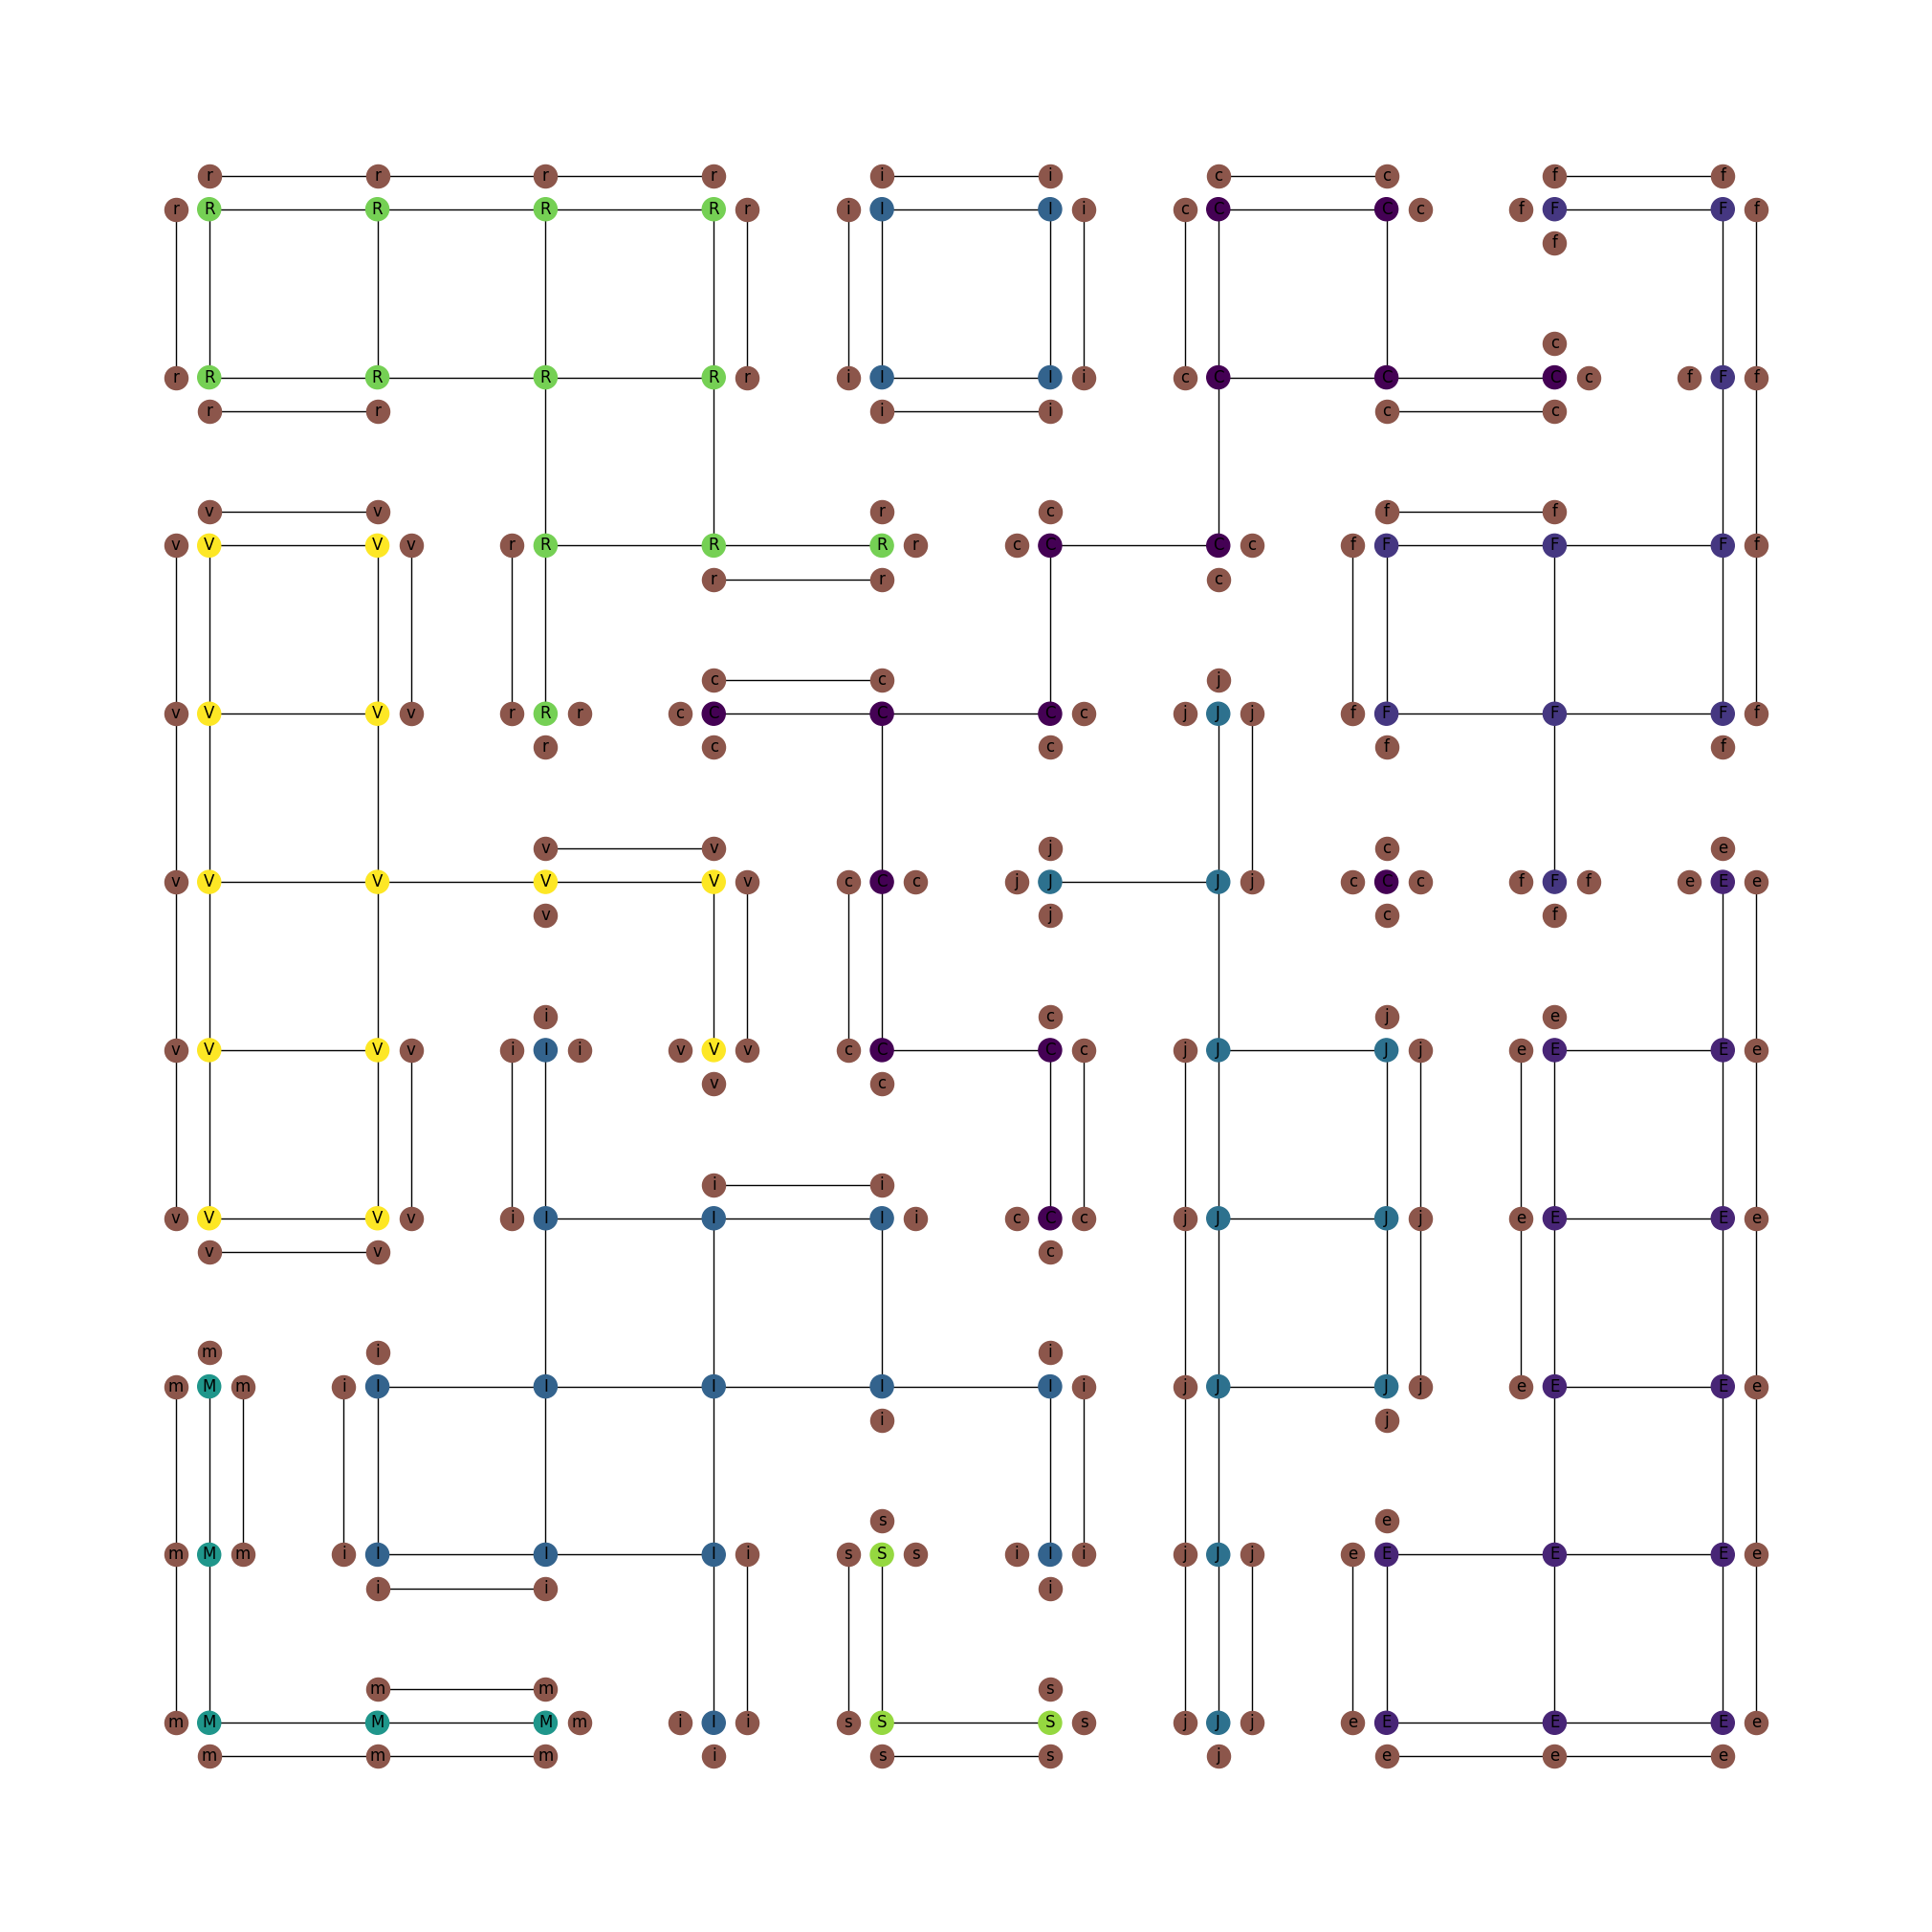

In [197]:
if input_file.startswith('test'):
    plt.figure(figsize=(20, 20))
    positions = {node: (node[1], -node[0]) for node in G.nodes}
    nx.draw(G, with_labels=True, pos=positions, labels=labels, cmap='viridis', node_color=[colors[node] for node in G.nodes])

    F = nx.union_all(fence_graphs)
    fence_node_positions = {node: (node[1], -node[0]) for node in F.nodes}
    nx.draw(F, with_labels=True, pos=fence_node_positions, labels=fence_graph_labels, node_color='tab:brown')